In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

/Users/takizawatakafumi/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv("data/data3a.csv")
data.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [3]:
labels, uniques = pd.factorize(data['f'])
data['f'] = labels
data.head()

,y,x,f
0,6,8.31,0
1,6,9.44,0
2,6,9.50,0
3,12,9.07,0
4,10,10.16,0


In [8]:
# 一定モデル
model1 = sm.GLM(data['y'], np.ones(len(data)), family=sm.families.Poisson())
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Thu, 06 Dec 2018   Deviance:                       89.507
Time:                        17:18:22   Pearson chi2:                     87.1
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0580      0.036     57.586      0.000       1.988       2.128
==============================================================================
"""

In [4]:
# xモデル
model2 = sm.GLM(data['y'], sm.add_constant(data['x']), family=sm.families.Poisson())
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 06 Dec 2018   Deviance:                       84.993
Time:                        17:13:05   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [9]:
deltaD = fit1.deviance - fit2.deviance
print(deltaD)

4.513941078851772


In [15]:
data['y_rnd'] = np.random.poisson(data['y'].mean(), len(data))

In [16]:
# 一定モデル
fit1 = sm.GLM(data['y_rnd'], np.ones(len(data)), family=sm.families.Poisson()).fit()
# xモデル
fit2 = sm.GLM(data['y_rnd'], sm.add_constant(data['x']), family=sm.families.Poisson()).fit()
fit1.deviance - fit2.deviance

2.6757225367872195

(array([685., 159.,  76.,  42.,  16.,  10.,   5.,   4.,   0.,   3.]),
 array([4.88628018e-08, 9.99149287e-01, 1.99829852e+00, 2.99744776e+00,
        3.99659700e+00, 4.99574624e+00, 5.99489548e+00, 6.99404471e+00,
        7.99319395e+00, 8.99234319e+00, 9.99149243e+00]),
 <a list of 10 Patch objects>)

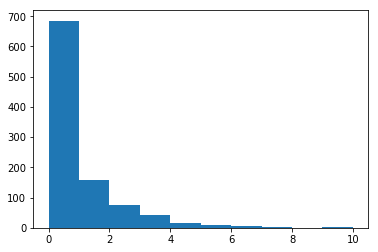

In [17]:
dd = []
for i in range(1000):
    data['y_rnd'] = np.random.poisson(data['y'].mean(), len(data))
    # 一定モデル
    fit1 = sm.GLM(data['y_rnd'], np.ones(len(data)), family=sm.families.Poisson()).fit()
    # xモデル
    fit2 = sm.GLM(data['y_rnd'], sm.add_constant(data['x']), family=sm.families.Poisson()).fit()
    deltaD = fit1.deviance - fit2.deviance
    dd.append(deltaD)
    
plt.hist(np.array(dd))

(array([443., 162.,  83.,  78.,  48.,  38.,  28.,  28.,  17.,  17.,  14.,
          7.,   6.,   7.,   5.,   4.,   1.,   3.,   2.,   1.,   3.,   0.,
          1.,   1.,   0.,   0.,   0.,   1.,   2.]),
 array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
         1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
         3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
         5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
         6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
         8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ]),
 <a list of 29 Patch objects>)

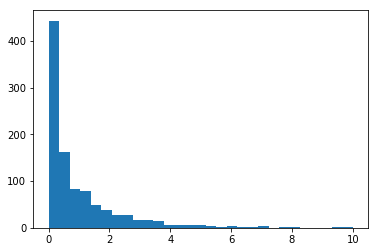

In [21]:
plt.hist(np.array(dd),bins=np.linspace(0, 10, 30))

In [22]:
dd = np.array(dd)
sum(dd >= 4.5)

31